In [45]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Create data set object
iris = load_iris()

In [47]:
# Convert to dataframe
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [48]:
# Check out
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [49]:
# get features and labels from dataframe
X = iris_df.drop("target",axis=1).values
y = iris_df["target"].values

In [50]:
# split training and testing data set 70:30 according to the rule of thumb that Aj said
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42
                                                    ,shuffle=True)


In [51]:
# Convert to tensor 
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [52]:
# creating the neural network with 4 input nodes, 2 hidden layers (6 nodes for each)
# and 3 output nodes (according to number of classes)
# relu as activation function
from torch import nn
import torch.nn.functional as F
from torch import optim

class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=6, hidden_layer2=6, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [53]:
# create model object
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=6, bias=True)
  (out): Linear(in_features=6, out_features=3, bias=True)
)

In [54]:
# CrossEntropy as loss function
# use Adam as optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

epoch:  0  loss: 1.13593137
epoch:  1  loss: 1.11570930
epoch:  2  loss: 1.10180485
epoch:  3  loss: 1.09254837
epoch:  4  loss: 1.08648551
epoch:  5  loss: 1.08437192
epoch:  6  loss: 1.08494508
epoch:  7  loss: 1.08480799
epoch:  8  loss: 1.08294237
epoch:  9  loss: 1.08034635
epoch: 10  loss: 1.07817090
epoch: 11  loss: 1.07678223
epoch: 12  loss: 1.07564640
epoch: 13  loss: 1.07389975
epoch: 14  loss: 1.07109010
epoch: 15  loss: 1.06735170
epoch: 16  loss: 1.06311202
epoch: 17  loss: 1.05869329
epoch: 18  loss: 1.05414343
epoch: 19  loss: 1.04906797
epoch: 20  loss: 1.04304397
epoch: 21  loss: 1.03570271
epoch: 22  loss: 1.02784264
epoch: 23  loss: 1.01964664
epoch: 24  loss: 1.01061225
epoch: 25  loss: 1.00029480
epoch: 26  loss: 0.98867732
epoch: 27  loss: 0.97601706
epoch: 28  loss: 0.96251881
epoch: 29  loss: 0.94779998
epoch: 30  loss: 0.93160081
epoch: 31  loss: 0.91423827
epoch: 32  loss: 0.89617616
epoch: 33  loss: 0.87688214
epoch: 34  loss: 0.85599065
epoch: 35  loss: 0.8

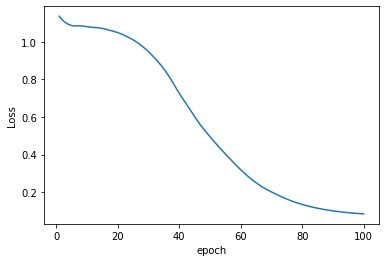

In [55]:
# training neural networks
epochs = 100
losses = []
preds = []
for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
    
    optimizer.zero_grad() # zero the gradients on each training pass
    loss.backward() # loss.backward() to calculate the gradients
    optimizer.step() # update the weight

# do not auto_grad for testing set due to we don't want to update weight
with torch.no_grad(): 
  for val in X_test:
      y_hat = model.forward(val)
      preds.append(y_hat.argmax().item())

plt.plot(range(1,epochs+1), losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [56]:
# create dataframe to see the predicted output and actual output
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]
df

,Y,YHat,Correct
0,1,1,1
1,0,0,1
2,2,2,1
3,1,1,1
4,1,1,1
5,0,0,1
6,1,1,1
7,2,2,1
8,1,1,1
9,1,1,1


In [57]:
df['Correct'].sum() / len(df)

1.0